## Work distributions for a harmonic oscillator in the canonical ensemble

### Hoover-Holian

\begin{eqnarray}
\dot{q} &=& p \\
\dot{p} &=& - \left(1 + \frac{t}{t_s} \right)^2 q - {\zeta p} - \beta \xi p^3 \\
\dot{\zeta} &=& \frac{\beta p^2 - 1}{\tau^2} \\
\dot{\xi} &=& \frac{\beta^2 p^4 - 3 \beta p^2}{\tau^2} \\
\dot{\nu} &=& \zeta + 3\beta \xi p^2
\end{eqnarray}


$$ H = \frac{p^2}{2} + \omega_{\lambda}^2 \frac{x^2}{2} $$
con 
$$ \omega_{\lambda} = 1 + \lambda \qquad \lambda(t) = \frac{t}{t_s} $$

In [1]:
using DifferentialEquations
import Distributions.Normal
import Distributions.Logistic

In [2]:
using PyPlot

In [3]:
const b = 1.0/0.5;
const QNH = 1.0;
const tauHH = 1.0;
const QLog = 1.0;
Ns = 10^4;

In [4]:
x,y,z1 = randn(3)

3-element Array{Float64,1}:
  2.49199 
  1.30832 
 -0.516966

In [5]:
function HooverHolian(t, u, du; tau=tauHH, ts=1., beta = b) 
    du[1] = u[2]
    du[2] = -(1+t/ts)^2*u[1] - u[3]*u[2] - beta*u[4]*u[2]^3
    #du[2] = -(1)^2*u[1] - u[3]*u[2] - beta*u[4]*u[2]^3   ##Isothermal dynamics (omega = 1)
    du[3] = (beta*u[2]^2 - 1)/tau^2 
    du[4] = (beta^2*u[2]^4 - 3*beta*u[2]^2)/tau^2
    du[5] = u[3] + 3*beta*u[4]*u[2]^2
end 

HooverHolian (generic function with 1 method)

In [6]:
function workHH()
    q0,p0 = rand(Normal(0.0, 1./sqrt(b)),2)
    zeta0, xi0 = rand(Normal(0.0, 1./tauHH),2)
    nu0 = 0.0
    u0HH = [q0,p0,zeta0,xi0, nu0]
    I0 = q0^2/2. + p0^2./2. + tauHH^2.*zeta0^2./(2*b) + tauHH^2.*xi0^2/(2*b)
    tspan = (0.0,1.0)
    probHH = ODEProblem(HooverHolian,u0HH,tspan)
    solHH = solve(probHH, DP5());
    HHsol = solHH.u;
    qf, pf, zetaf, xif, nuf = HHsol[end];
    If = 4.*qf^2/2. + pf^2./2. + tauHH^2.*zetaf^2./(2*b) + tauHH^2.*xif^2/(2*b)
    return If - I0 + 1./b*nuf
end

workHH (generic function with 1 method)

In [7]:
workHH()

0.4224519034151055

In [8]:
#Ns = 10^5
w_HH = zeros(Ns);
for i in 1:Ns
    w_HH[i] = workHH()
end

In [9]:
deltaF_HH = -1/b.*log(mean(exp(-b*w_HH)))  ##Theoretical = 1.0397

0.3400413891882835

In [10]:
mean(w_HH)

0.6089756710238152

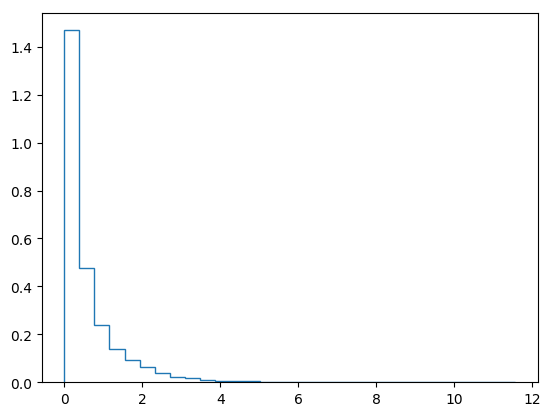

([1.46838,0.474766,0.237253,0.140796,0.092049,0.0635268,0.0401904,0.023855,0.0173726,0.0111496  …  0.000259293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000259293],[-0.00113128,0.384533,0.770197,1.15586,1.54152,1.92719,2.31285,2.69852,3.08418,3.46984  …  8.09781,8.48348,8.86914,9.2548,9.64047,10.0261,10.4118,10.7975,11.1831,11.5688],Any[PyObject <matplotlib.patches.Polygon object at 0x327f54350>])

In [11]:
plt[:hist](w_HH,bins = 30, normed = true, histtype="step")
#histogram(w_HH,nbins = 30, normed = true)

In [12]:
#deltaiHH = [HHsol[i][2]^2/2.  + HHsol[i][1]^2/2. + tauHH^2.*HHsol[i][3]^2/(2.*b) + tauHH^2.*HHsol[i][4]^2/(2.*b) + 1./b*HHsol[i][5] for i in 1:length(HHsol)] - I0;

In [13]:
#plot(deltaiHH)

### Nosé-Hoover

$$ f(\zeta) = \sqrt{\frac{\beta}{2\pi Q}} \exp\left(-\frac{\beta \zeta^2}{2 Q} \right) $$

\begin{eqnarray}
\dot{q} &=& p \\
\dot{p} &=& -\left(1 + \frac{t}{t_s} \right)^2 q - \frac{\zeta p}{Q} \\
\dot{\zeta} &=& p^2 - \frac{1}{\beta} \\
\dot{\nu} &=& \frac{\zeta}{Q}
\end{eqnarray}

In [14]:
function NoseHoover(t, u, du; ts=1., beta = b, Q = QNH) 
    du[1] = u[2]
    du[2] = -(1+t/ts)^2*u[1] - u[3]*u[2]/Q 
    #du[2] = -(1)^2*u[1] - u[3]*u[2]/Q  ##Isothermal dynamics (omega = 1)
    du[3] = u[2]^2 - 1/beta
    du[4] = u[3]/Q
end 

NoseHoover (generic function with 1 method)

In [38]:
function workNH()
    q0,p0 = rand(Normal(0.0, 1./sqrt(b)),2)
    zeta0 = rand(Normal(0.0, QNH/sqrt(b)))
    #q0,p0,zeta0=x,y,z1
    nu0 = 0.0
    u0NH = [q0,p0,zeta0,nu0]
    I0 = q0^2/2. + p0^2./2. + zeta0^2./(2*QNH)
    tspan = (0.0,1.0)
    probNH = ODEProblem(NoseHoover,u0NH,tspan)
    solNH = solve(probNH,DP5());
    NHsol = solNH.u;
    qf, pf, zetaf, nuf = NHsol[end];
    If = 4.*qf^2/2. + pf^2./2. + zetaf^2./(2*QNH) 
    return If - I0 + 1./b*nuf
end

workNH (generic function with 1 method)

In [39]:
workNH()

0.19684997579749558

In [40]:
#Ns = 10^5
w_NH = zeros(Ns);
for i in 1:Ns
    w_NH[i] = workNH()
end

In [41]:
deltaF_NH = -1/b.*log(mean(exp(-b*w_NH)))  ##Theoretical = 1.0397

0.3499523831238056

In [42]:
mean(w_NH)

0.6247565060730833

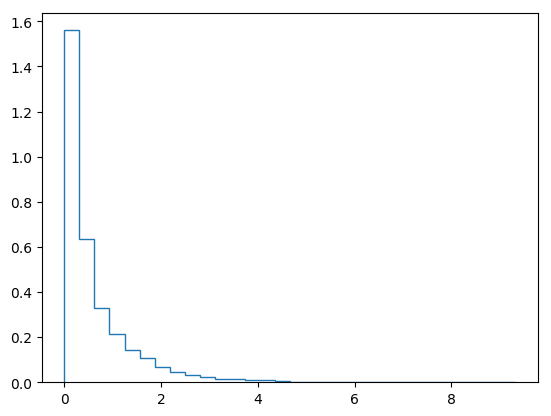

([1.5604,0.634396,0.327659,0.21404,0.141943,0.106216,0.0688791,0.0440955,0.0321865,0.0247836  …  0.00064373,0.000321865,0.000321865,0.00064373,0.00064373,0.0,0.000321865,0.0,0.0,0.000321865],[4.48138e-5,0.310734,0.621423,0.932112,1.2428,1.55349,1.86418,2.17487,2.48556,2.79625  …  6.52452,6.83521,7.14589,7.45658,7.76727,8.07796,8.38865,8.69934,9.01003,9.32072],Any[PyObject <matplotlib.patches.Polygon object at 0x32bd6c150>])

In [43]:
plt[:hist](w_NH,bins = 30, normed = true, histtype="step")
#histogram(w_NH,nbins = 30, normed = true)

In [44]:
#deltaiNH = [NHsol[i][2]^2/2.  + NHsol[i][1]^2/2. + NHsol[i][3]^2/(2.*QNH)  + 1./b*NHsol[i][4] for i in 1:length(solNH.u)] - I0;

### Logistic thermostat

\begin{eqnarray}
\dot{q} &=& p \\
\dot{p} &=& -\left(1 + \frac{t}{t_s} \right)^2 q - \frac{\tanh\left(\frac{\zeta}{2Q} \right)p}{\beta Q} \\
\dot{\zeta} &=& p^2 - \frac{1}{\beta} \\
\dot{\nu} &=& \frac{\tanh\left(\frac{\zeta}{2Q} \right)}{\beta Q}
\end{eqnarray}

In [45]:
function LogisticTh(t, u, du; ts=1., beta = b, Q = QLog) 
    du[1] = u[2]
    du[2] = -(1+t/ts)^2*u[1] - tanh(u[3]/(2*Q))*u[2]/(beta*Q)
    #du[2] = -(1)^2*u[1] - u[3]*u[2]/Q  ##Isothermal dynamics (omega = 1)
    du[3] = u[2]^2 - 1/beta
    du[4] = tanh(u[3]/(2*Q))/(beta*Q)
end 

LogisticTh (generic function with 1 method)

In [46]:
function worklog()
    q0,p0 = rand(Normal(0.0, 1./sqrt(b)),2)
    z0 = rand(Logistic(0.0,QLog))
    #q0,p0,z0=x,y,z1
    nu0 = 0.0
    u0 = [q0,p0,z0,nu0]
    I0 = q0^2/2. + p0^2./2. - log(exp(z0/QLog)/(QLog*(1+exp(z0/QLog))^2.))/b
    tspan = (0.0,1.0)
    problog = ODEProblem(LogisticTh,u0,tspan)
    sol = solve(problog, DP8());
    Lsol = sol.u;
    qf, pf, zf, nuf = Lsol[end];
    If = 4.*qf^2/2. + pf^2./2. - log(exp(zf/QLog)/(QLog*(1+exp(zf/QLog))^2.))/b
    return If - I0 + 1./b*nuf
end

worklog (generic function with 1 method)

In [47]:
worklog()

0.28407400825406914

In [48]:
Ns = 10^4
w_log = zeros(Ns);
for i in 1:Ns
    w_log[i] = worklog()
end

In [49]:
deltaF_log = -1/b*log(mean(exp(-b*w_log)))  ##Theoretical = 1.0397

0.3438773580466026

In [50]:
mean(w_log)

0.6020188173097868

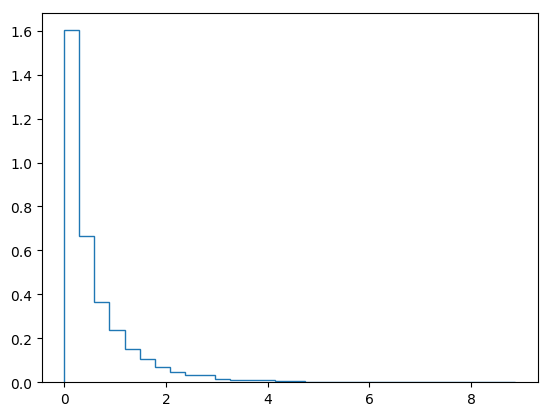

([1.60193,0.66533,0.364291,0.239478,0.152211,0.107562,0.0713699,0.0480309,0.0348393,0.0314569  …  0.0,0.0,0.000338246,0.0,0.0,0.000338246,0.0,0.0,0.0,0.000676492],[8.44068e-6,0.295651,0.591294,0.886937,1.18258,1.47822,1.77386,2.06951,2.36515,2.66079  …  6.20851,6.50415,6.79979,7.09543,7.39108,7.68672,7.98236,8.27801,8.57365,8.86929],Any[PyObject <matplotlib.patches.Polygon object at 0x32bf4bad0>])

In [51]:
plt[:hist](w_log,bins = 30, normed = true, histtype="step")
#histogram(w_log,nbins = 30, normed = true)

## Comparison

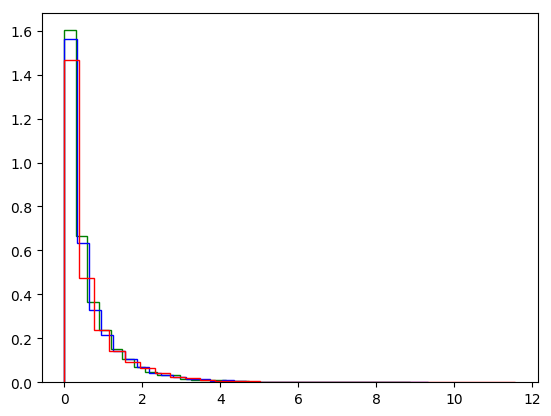

([1.46838,0.474766,0.237253,0.140796,0.092049,0.0635268,0.0401904,0.023855,0.0173726,0.0111496  …  0.000259293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000259293],[-0.00113128,0.384533,0.770197,1.15586,1.54152,1.92719,2.31285,2.69852,3.08418,3.46984  …  8.09781,8.48348,8.86914,9.2548,9.64047,10.0261,10.4118,10.7975,11.1831,11.5688],Any[PyObject <matplotlib.patches.Polygon object at 0x32c10e550>])

In [52]:
plt[:hist](w_log,bins = 30, normed = true, histtype="step", color="g")
plt[:hist](w_NH,bins = 30, normed = true, histtype="step", color = "blue")
plt[:hist](w_HH,bins = 30, normed = true, histtype="step", color = "red")

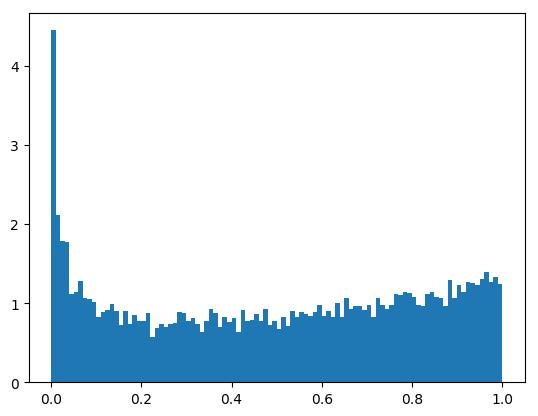

([4.4504,2.11019,1.79016,1.77016,1.1101,1.1401,1.28011,1.0601,1.05009,1.02009  …  1.23011,1.1401,1.27011,1.25011,1.23011,1.31012,1.40013,1.27011,1.33012,1.24011],[8.01913e-9,0.00999911,0.0199982,0.0299973,0.0399964,0.0499955,0.0599946,0.0699937,0.0799928,0.0899919  …  0.909918,0.919918,0.929917,0.939916,0.949915,0.959914,0.969913,0.979912,0.989911,0.99991],Any[PyObject <matplotlib.patches.Rectangle object at 0x32c2b7210>,PyObject <matplotlib.patches.Rectangle object at 0x32c2b7890>,PyObject <matplotlib.patches.Rectangle object at 0x32c2b7f10>,PyObject <matplotlib.patches.Rectangle object at 0x32c2c15d0>,PyObject <matplotlib.patches.Rectangle object at 0x32c2c1c50>,PyObject <matplotlib.patches.Rectangle object at 0x32c2cd310>,PyObject <matplotlib.patches.Rectangle object at 0x32c2cd990>,PyObject <matplotlib.patches.Rectangle object at 0x32c2cde90>,PyObject <matplotlib.patches.Rectangle object at 0x32c2dc6d0>,PyObject <matplotlib.patches.Rectangle object at 0x32c2dcd50>  …  PyObject <mat

In [53]:
plt[:hist](exp(-b*w_NH), bins = 100, normed = true)
#plt[:hist](exp(-b*w_NH),bins = 30, normed = true, histtype="step", color = "blue")
#plt[:hist](exp(-b*w_HH),bins = 30, normed = true, histtype="step", color = "red")

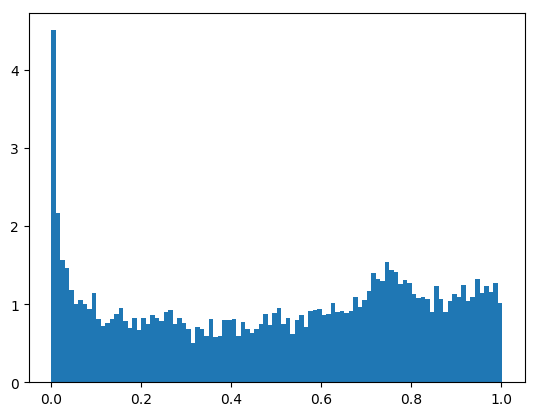

([4.50978,2.1651,1.56645,1.46668,1.18731,0.99774,1.0576,1.00772,0.937876,1.13742  …  1.08754,1.24717,1.04763,1.09751,1.32699,1.1474,1.2372,1.15738,1.26713,1.01769],[8.94292e-11,0.0100227,0.0200453,0.030068,0.0400906,0.0501133,0.0601359,0.0701586,0.0801812,0.0902039  …  0.912061,0.922084,0.932107,0.942129,0.952152,0.962175,0.972197,0.98222,0.992242,1.00227],Any[PyObject <matplotlib.patches.Rectangle object at 0x32c674090>,PyObject <matplotlib.patches.Rectangle object at 0x32c674710>,PyObject <matplotlib.patches.Rectangle object at 0x32c674d90>,PyObject <matplotlib.patches.Rectangle object at 0x32c681450>,PyObject <matplotlib.patches.Rectangle object at 0x32c681ad0>,PyObject <matplotlib.patches.Rectangle object at 0x32c681fd0>,PyObject <matplotlib.patches.Rectangle object at 0x32c68d810>,PyObject <matplotlib.patches.Rectangle object at 0x32c68de90>,PyObject <matplotlib.patches.Rectangle object at 0x32c699550>,PyObject <matplotlib.patches.Rectangle object at 0x32c699bd0>  …  PyObject <mat

In [54]:
plt[:hist](exp(-b*w_HH), bins = 100, normed = true)

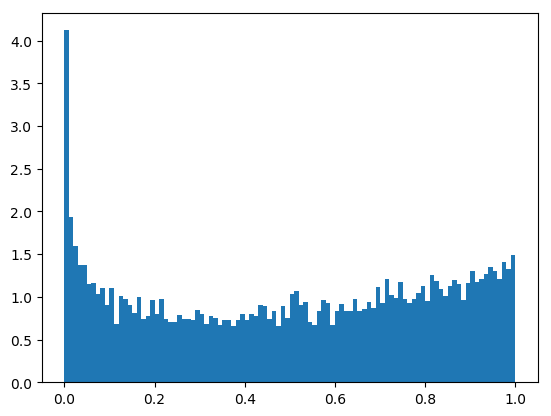

([4.12007,1.93003,1.59003,1.37002,1.37002,1.15002,1.16002,1.03002,1.10002,0.910015  …  1.30002,1.17002,1.21002,1.27002,1.35002,1.30002,1.21002,1.41002,1.33002,1.49003],[1.97803e-8,0.00999985,0.0199997,0.0299995,0.0399993,0.0499992,0.059999,0.0699988,0.0799987,0.0899985  …  0.909985,0.919984,0.929984,0.939984,0.949984,0.959984,0.969984,0.979983,0.989983,0.999983],Any[PyObject <matplotlib.patches.Rectangle object at 0x32ca19fd0>,PyObject <matplotlib.patches.Rectangle object at 0x32ca28690>,PyObject <matplotlib.patches.Rectangle object at 0x32ca28d10>,PyObject <matplotlib.patches.Rectangle object at 0x32ca323d0>,PyObject <matplotlib.patches.Rectangle object at 0x32ca32a50>,PyObject <matplotlib.patches.Rectangle object at 0x32ca32f50>,PyObject <matplotlib.patches.Rectangle object at 0x32ca40790>,PyObject <matplotlib.patches.Rectangle object at 0x32ca40e10>,PyObject <matplotlib.patches.Rectangle object at 0x32ca4d4d0>,PyObject <matplotlib.patches.Rectangle object at 0x32ca4db50>  …  PyObjec

In [55]:
plt[:hist](exp(-b*w_log), bins = 100, normed = true)

In [56]:
maximum(exp(-b*w_log)), minimum(exp(-b*w_log))

(0.9999831187905901,1.9780254455468446e-8)

In [34]:
maximum(exp(-b*w_HH)), minimum(exp(-b*w_HH))

(1.0022651227844392,8.942915338444728e-11)

In [35]:
mean(exp(-b*w_log)), std(exp(-b*w_log))

(2.073900142481147e-8,4.963331848115047e-23)

In [36]:
mean(exp(-b*w_HH)), std(exp(-b*w_HH))

(0.506575057169108,0.31597156645785185)

In [37]:
mean(exp(-b*w_NH)), std(exp(-b*w_NH))

(1.3968998828233629e-8,2.8125547139318597e-23)